# Export Discord Data
Use discord chat export to export the target discussion into cvs format. Following link is the tools and details steps to export data
https://github.com/Tyrrrz/DiscordChatExporter

In this chapter, we mainly export only announcement and general discussion from the target group. 

# Explore discord data

In [12]:
import json
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import pandas_datareader as web
warnings.filterwarnings("ignore")

In [2]:
#identify specific date to extract
start = dt.datetime(2021,10,1)
end = dt.datetime(2022,4,30)

#2021-10-01 to 2022-04-30

In [3]:
#extract data from yahoo finance
MANA = web.DataReader('MANA-USD','yahoo', start, end)
SAND = web.DataReader('SAND-USD','yahoo', start, end)
THETA = web.DataReader('THETA-USD','yahoo', start, end)
AXS = web.DataReader('AXS-USD','yahoo', start, end)
STX = web.DataReader('STX-USD','yahoo', start, end)

In [4]:
MANA = MANA.reset_index()
SAND = SAND.reset_index()
THETA = THETA.reset_index()
AXS = AXS.reset_index()
STX = STX.reset_index()

In [5]:
def match_date(start, end, data):
    data.Date = pd.to_datetime(data.Date)
    data = data[(data['Date'] >= start) & (data['Date'] <= end)]
    data["Date"] = data["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
    #data.columns = data.columns.str.replace('Date', 'date')
    return data

In [6]:
MANA = match_date(start, end, MANA)
SAND = match_date(start, end, SAND)
THETA = match_date(start, end, THETA)
AXS = match_date(start, end, AXS)
STX = match_date(start, end, STX)

#add pct change column
ClosingPrice = MANA[['Adj Close']]
MANA['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = SAND[['Adj Close']]
SAND['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = THETA[['Adj Close']]
THETA['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = AXS[['Adj Close']]
AXS['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = STX[['Adj Close']]
STX['pct_change'] = ClosingPrice.pct_change()*100

MANA = MANA.set_index('Date')
SAND = SAND.set_index('Date')
THETA = THETA.set_index('Date')
AXS = AXS.set_index('Date')
STX = STX.set_index('Date')

In [7]:
import matplotlib.ticker as ticker

def plot_count_content_by_week(data, title):

    # create a Series, grouping by week
    weekly_series = data.groupby(pd.Grouper(key='Date', freq='W-MON'))['Content'].count()
    # and plot it
    ax =weekly_series.plot(kind='bar')

    # Set title and labels for axes
    ax.set(xlabel="Date",
       ylabel="Count transactions",
       title="{0} frequency transactions by week".format(title))
    
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(weekly_series.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in weekly_series.index[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in weekly_series.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    
    plt.gcf().autofmt_xdate()

    plt.show()
    

In [8]:
MANA_Announcement = pd.read_csv(r"Data/discord/Decentraland - announcements (2021-10-01 to 2022-04-30).csv", sep=",")
MANA_Discussion = pd.read_csv(r"Data/discord/Decentraland - general (2021-10-01 to 2022-04-30).csv", sep=",")

MANA_Announcement["Date"] = MANA_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
MANA_Announcement["Date"] = MANA_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
MANA_Discussion["Date"] = MANA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
MANA_Discussion["Date"] = MANA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [9]:
MANA_Announcement_By_Daily_Count=MANA_Announcement.groupby(pd.Grouper(key='Date', freq='D'))['Content'].count()
MANA_Discussion_By_Daily_Count=MANA_Discussion.groupby(pd.Grouper(key='Date', freq='D'))['Content'].count()

In [10]:
#join data
MANA_Ann_Merge = MANA.join(MANA_Announcement_By_Daily_Count)
MANA_Ann_Merge = MANA_Ann_Merge.fillna(0)
MANA_Ann_Filter = MANA_Ann_Merge[MANA_Ann_Merge["Content"]>0].reset_index()

#join data
MANA_Discussion_Merge = MANA.join(MANA_Discussion_By_Daily_Count)
MANA_Discussion_Merge = MANA_Discussion_Merge.fillna(0)
MANA_Discussion_Filter = MANA_Discussion_Merge[MANA_Discussion_Merge["Content"]>0].reset_index()

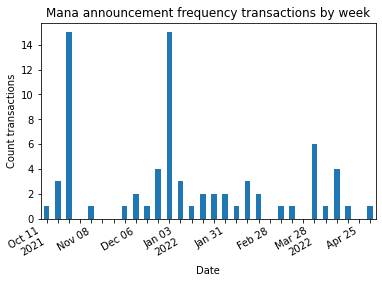

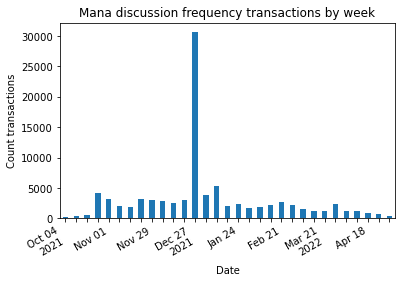

In [13]:
plot_count_content_by_week(MANA_Announcement, "Mana announcement")
plot_count_content_by_week(MANA_Discussion, "Mana discussion")
#plot_count_content_by_week(MANA_Discussion, "Mana discussion")

In [14]:
MANA_Announcement[["Content"]].describe()

,Content
count,74
unique,74
top,@everyone The countdown begins. Four days of m...
freq,1


In [15]:
MANA_Discussion[["Content"]].describe()

,Content
count,92502
unique,81709
top,hi
freq,278


In [16]:
SAND_Announcement = pd.read_csv(r"Data/discord/The Sandbox - announcements (2021-10-01 to 2022-04-30).csv", sep=",")
SAND_Discussion = pd.read_csv(r"Data/discord/The Sandbox - general (2021-10-01 to 2022-04-30).csv", sep=",")

SAND_Announcement["Date"] = SAND_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
SAND_Announcement["Date"] = SAND_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
SAND_Discussion["Date"] = SAND_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
SAND_Discussion["Date"] = SAND_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

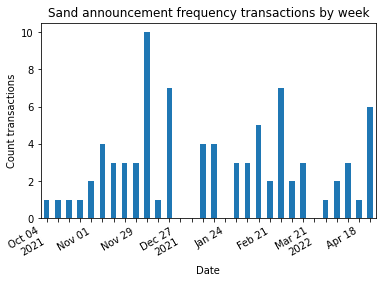

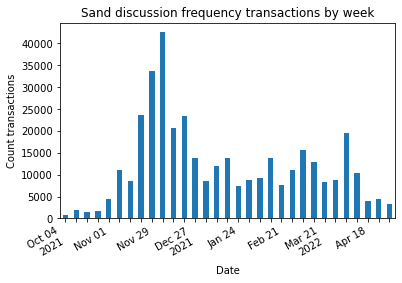

In [17]:
plot_count_content_by_week(SAND_Announcement, "Sand announcement")
plot_count_content_by_week(SAND_Discussion, "Sand discussion")

In [18]:
SAND_Announcement[["Content"]].describe()

,Content
count,83
unique,80
top,@everyone
freq,4


In [19]:
SAND_Discussion[["Content"]].describe()

,Content
count,366716
unique,321242
top,hi
freq,1191


In [20]:
THETA_Announcement = pd.read_csv(r"Data/discord/Theta Network - announcements (2021-10-01 to 2022-04-30).csv", sep=",")
THETA_Discussion = pd.read_csv(r"Data/discord/Theta Network - general (2021-10-01 to 2022-04-30).csv", sep=",")

THETA_Announcement["Date"] = THETA_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
THETA_Announcement["Date"] = THETA_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
THETA_Discussion["Date"] = THETA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
THETA_Discussion["Date"] = THETA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

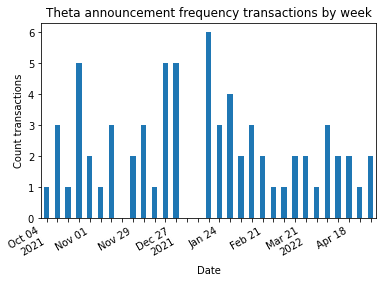

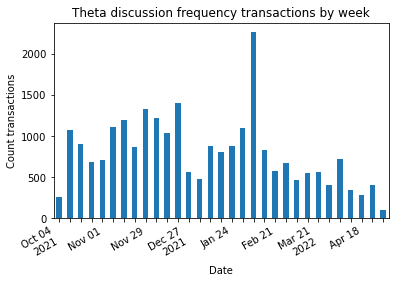

In [21]:
plot_count_content_by_week(THETA_Announcement, "Theta announcement")
plot_count_content_by_week(THETA_Discussion, "Theta discussion")

In [22]:
THETA_Announcement[["Content"]].describe()

,Content
count,69
unique,69
top,"Introducing the new Theta Video API service, g..."
freq,1


In [23]:
THETA_Discussion[["Content"]].describe()

,Content
count,24696
unique,22776
top,⚠️📢 Real admin/mods only talk here in this cha...
freq,129


In [24]:
STX_Announcement = pd.read_csv(r"Data/discord/Stacks - announcements (2021-10-01 to 2022-04-30).csv", sep=",")
STX_Discussion = pd.read_csv(r"Data/discord/Stacks - general (2021-10-01 to 2022-04-30).csv", sep=",")

STX_Announcement["Date"] = STX_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
STX_Announcement["Date"] = STX_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
STX_Discussion["Date"] = STX_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
STX_Discussion["Date"] = STX_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

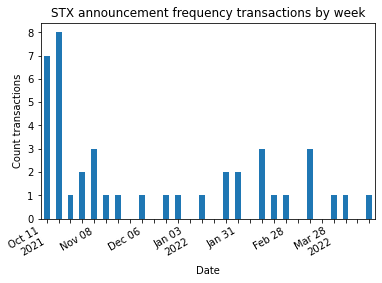

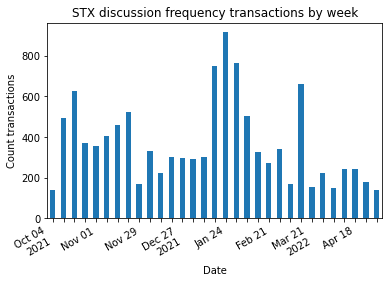

In [25]:
plot_count_content_by_week(STX_Announcement, "STX announcement")
plot_count_content_by_week(STX_Discussion, "STX discussion")

In [26]:
STX_Announcement[["Content"]].describe()

,Content
count,42
unique,42
top,"@here Hey Stacks folks, we just published a po..."
freq,1


In [27]:
STX_Discussion[["Content"]].describe()

,Content
count,11344
unique,10455
top,Hi
freq,128


In [28]:
AXS_Announcement = pd.read_csv(r"Data/discord/Axie Infinity - announcements (2021-10-01 to 2022-04-30).csv", sep=",")
AXS_Discussion_1 = pd.read_csv(r"Data/discord/Axie Infinity - general (2021-10-21 to 2021-12-11).csv", sep=",")
AXS_Discussion_2 = pd.read_csv(r"Data/discord/Axie Infinity - general (2021-12-12 to 2022-04-25).csv", sep=",")

In [29]:
AXS_Discussion = AXS_Discussion_1.append(AXS_Discussion_2, ignore_index=True)
AXS_Discussion = AXS_Discussion.reset_index()
AXS_Discussion = AXS_Discussion.set_index("index")

AXS_Announcement["Date"] = AXS_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
AXS_Announcement["Date"] = AXS_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
AXS_Discussion["Date"] = AXS_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
AXS_Discussion["Date"] = AXS_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

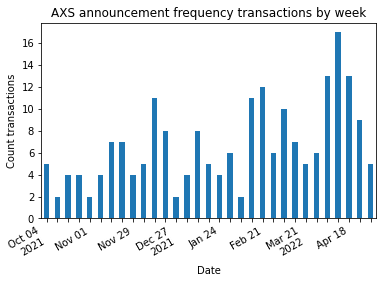

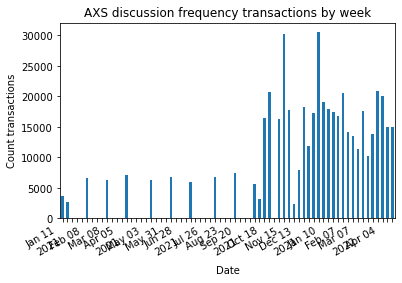

In [30]:
plot_count_content_by_week(AXS_Announcement, "AXS announcement")
plot_count_content_by_week(AXS_Discussion, "AXS discussion")

In [31]:
AXS_Announcement[["Content"]].describe()

,Content
count,208
unique,197
top,@here
freq,5


In [32]:
AXS_Discussion[["Content"]].describe()

,Content
count,501921
unique,428559
top,Hi
freq,1893
